<a href="https://colab.research.google.com/github/will-cotton4/DS-Unit-1-Sprint-3-Data-Storytelling/blob/master/module3-make-explanatory-visualizations/LS_DS_223_Make_explanatory_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make explanatory visualizations




Tody we will reproduce this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

In [2]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Using this data: https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

Objectives
- add emphasis and annotations to transform visualizations from exploratory to explanatory
- remove clutter from visualizations

Links
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

## Make prototypes

This  helps us understand the problem

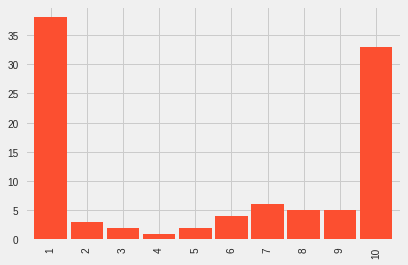

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);

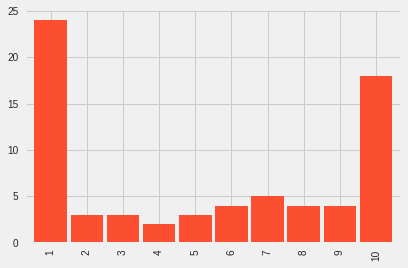

In [4]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

## Annotate with text

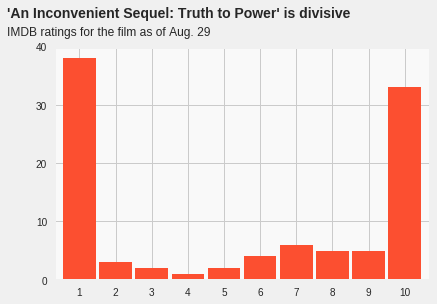

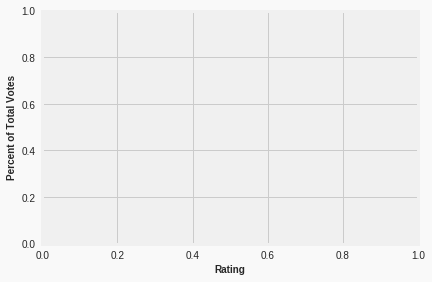

In [5]:
plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

ax = fake.plot.bar(color='C1', width=0.9);

ax.set(yticks = range(0,50,10))
fig = plt.figure()
fig.patch.set_facecolor('#f9f9f9')

plt.ylabel('Percent of Total Votes', fontsize=10, fontweight='bold')
plt.xlabel('Rating', fontsize=10, fontweight='bold')

ax.text(x=-2, y=45,
        s="'An Inconvenient Sequel: Truth to Power' is divisive",
        fontsize = 14, fontweight = 'bold');

ax.text(x=-2, y=42,
        s="IMDB ratings for the film as of Aug. 29",
        fontsize = 12);

ax.tick_params(labelrotation=0)

ax.set_facecolor('#f9f9f9')

In [6]:
display(example)

## Reproduce with real data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [15]:
pd.set_option('display.max_columns', 500)
df.sample(1).T

,9723
timestamp,2017-08-04 05:50:03.336466
respondents,472
category,Aged 30-44
link,http://www.imdb.com/title/tt6322922/ratings-age_3
average,5.3
mean,5.5
median,6
1_votes,198
2_votes,14
3_votes,7


In [0]:
df['timestamp'] = df['timestamp'].apply(pd.to_datetime)

In [27]:
df.dtypes

timestamp      datetime64[ns]
respondents             int64
category               object
link                   object
average               float64
mean                  float64
median                  int64
1_votes                 int64
2_votes                 int64
3_votes                 int64
4_votes                 int64
5_votes                 int64
6_votes                 int64
7_votes                 int64
8_votes                 int64
9_votes                 int64
10_votes                int64
1_pct                 float64
2_pct                 float64
3_pct                 float64
4_pct                 float64
5_pct                 float64
6_pct                 float64
7_pct                 float64
8_pct                 float64
9_pct                 float64
10_pct                float64
dtype: object

In [25]:
df = df.reset_index('timestamp')

KeyError: ignored

In [8]:
ax = df.plot.bar()
plt.ylabel('Percent of Total Votes', fontsize=10, fontweight='bold')
plt.xlabel('Rating', fontsize=10, fontweight='bold')

ax.text(x=-2, y=45,
        s="'An Inconvenient Sequel: Truth to Power' is divisive",
        fontsize = 14, fontweight = 'bold');

ax.text(x=-2, y=42,
        s="IMDB ratings for the film as of Aug. 29",
        fontsize = 12);

ax.tick_params(labelrotation=0)

ax.set_facecolor('#f9f9f9')

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f8c216fb1e0> (for post_execute):


KeyboardInterrupt: ignored

# ASSIGNMENT

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

# STRETCH OPTIONS

#### Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) (try the [`altair`](https://altair-viz.github.io/gallery/index.html#maps) library)
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) (try the [`statsmodels`](https://www.statsmodels.org/stable/index.html) library)
- or another example of your choice!

#### Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!







